In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte

In [55]:
plt.rcParams.update({
    "axes.labelsize": 18,    # Axis labels
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 18    # Legend
})

$$
\begin{align*}
    \tilde{\nu} &= \cfrac{1}{2\pi c}\sqrt{\cfrac{C}{\mu_{red}}}, \qquad \mu_{red} = \cfrac{m_1m_2}{m_1 + m_2} = 6.24 * 1.66\cdot10^{-27} = 1.036\cdot10^{-26}\:\:\text{kg} \\ \\

    &\Rightarrow\:\: C = \mu_{red}4\pi^2c^2\tilde{\nu}^2
\end{align*}
$$

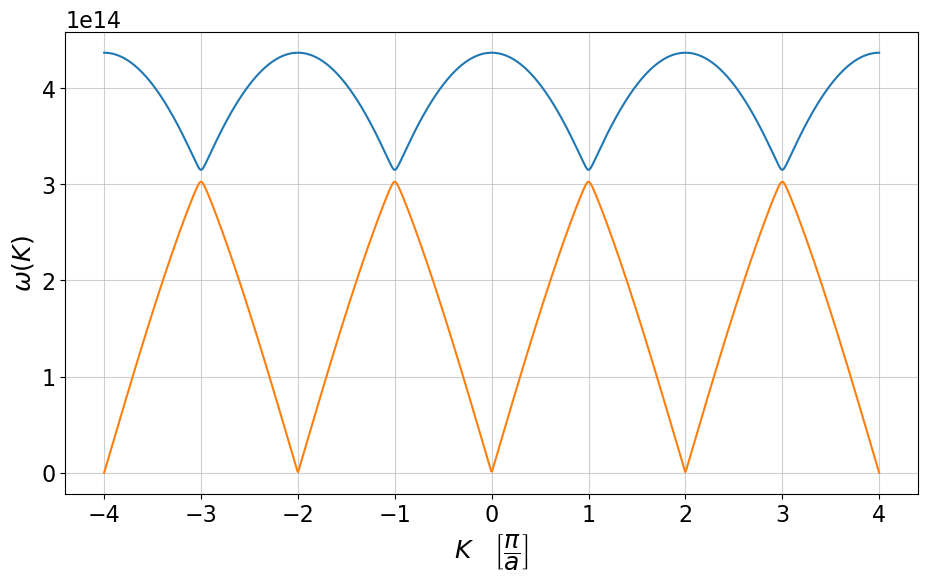

In [56]:
E_rayons_X = 40e3 * cte.e           # [J]
wvl = cte.h * cte.c / E_rayons_X    # [m]
k_question = 2 * np.pi / wvl        # [m^-1]

M1, M2 = 12 * 1.66e-27, 13 * 1.66e-27
mu_red, nu = (M1 * M2) / (M1 + M2), 164e3             # [kg], [m^-1]
C = mu_red * 4 * np.pi ** 2 * cte.c ** 2 * nu ** 2    # [N/m]
a = 0.133e-9                                          # [m]

k_graph = np.linspace(-4 * np.pi / a, 4 * np.pi / a, 1000)

omega_sq_opt = (2 * C * (M1 + M2) + 2 * C * np.sqrt((M1 + M2) ** 2 - 2 * M1 * M2 * (1 - np.cos(a * k_graph)))) / (2 * M1 * M2)
omega_sq_ac = (2 * C * (M1 + M2) - 2 * C * np.sqrt((M1 + M2) ** 2 - 2 * M1 * M2 * (1 - np.cos(a * k_graph)))) / (2 * M1 * M2)

plt.figure(figsize=(11, 6))

plt.plot(k_graph / (np.pi / a), np.sqrt(omega_sq_opt))
plt.plot(k_graph / (np.pi / a), np.sqrt(omega_sq_ac))
plt.xlabel(r"$K \quad \left[\dfrac{\pi}{a}\right]$")
plt.ylabel(r"$\omega(K)$")

plt.grid(alpha=0.6)
plt.show()